In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Cleaned_df = pd.read_excel('Final_excel.xlsx')

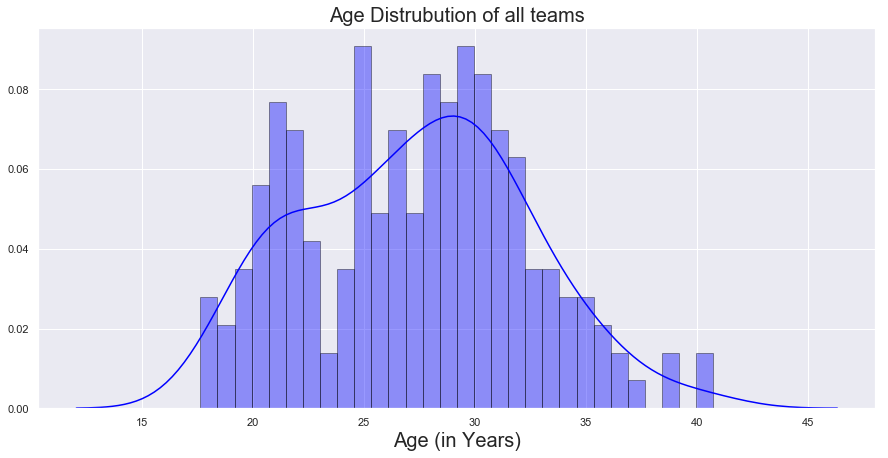

In [115]:
plt.figure(figsize=(15, 7))

sns.distplot(Cleaned_df['Age'], hist=True, kde=True, 
             bins=int(30), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Age (in Years)', size = 20)
plt.title('Age Distrubution of all teams', Size = 20)
plt.show()

# Average hieght of Players

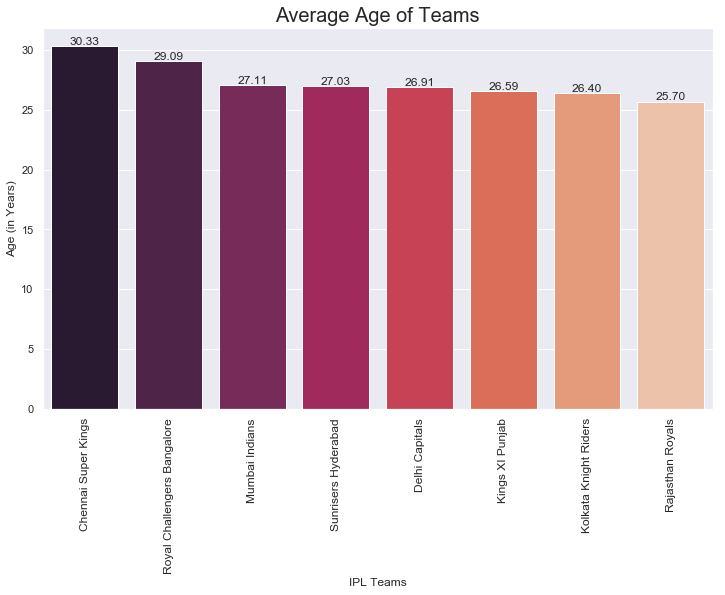

In [27]:
df = pd.DataFrame((Cleaned_df.groupby('Team')['Age'].mean())).sort_values(by = 'Age', ascending = False)

Team = []
Age = []
for i,j in df.iterrows():
    Team.append(i)
    Age.append(j)

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(x=Team, y=Age,palette="rocket")
plt.title('Average Age of Teams',size = 20)
plt.xticks(rotation='vertical', size=12)
plt.ylabel('Age (in Years)',size = 12)
plt.xlabel('IPL Teams',size = 12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+0.1, '{:1.2f}'.format(height),ha = "center")

#plt.tight_layout()
plt.show()


# Average Age of Uncapped players

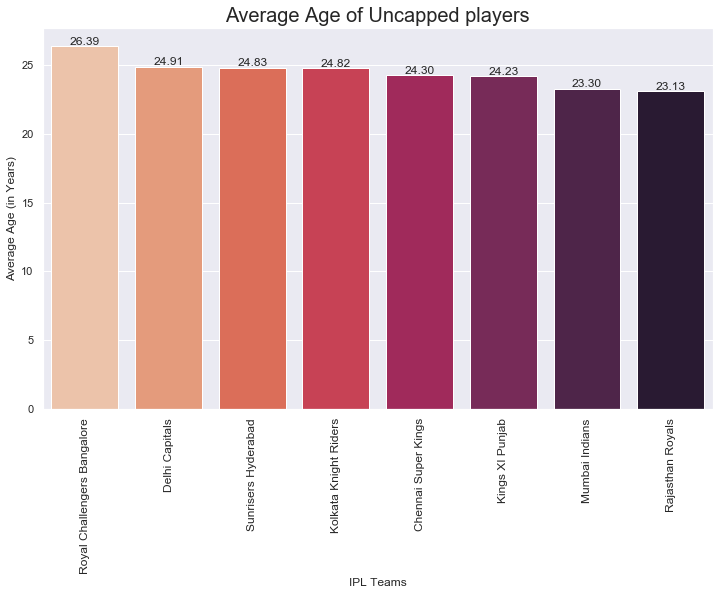

In [121]:
plt.figure(figsize=(12,7))

df = pd.DataFrame(Cleaned_df[(Cleaned_df['IsOverseasPlayer']=='No')&(Cleaned_df['IsUncapped']=='Uncapped')].groupby('Team')['Age'].mean())
#plot(kind = 'bar')
df = df.sort_values(by = 'Age', ascending = False)

Team = []
Age = []
for i,j in df.iterrows():
    Team.append(i)
    Age.append(j)

ax = sns.barplot(x=Team, y=Age,palette="rocket_r")
plt.title('Average Age of Uncapped players',size = 20)
plt.xticks(rotation='vertical', size=12)
plt.ylabel('Average Age (in Years)',size = 12)
plt.xlabel('IPL Teams',size = 12)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+0.1, '{:1.2f}'.format(height),ha = "center")

plt.show()

# Team Wise number of Overseas Players
Every team has similar distribution of Overseased player in their dugouts

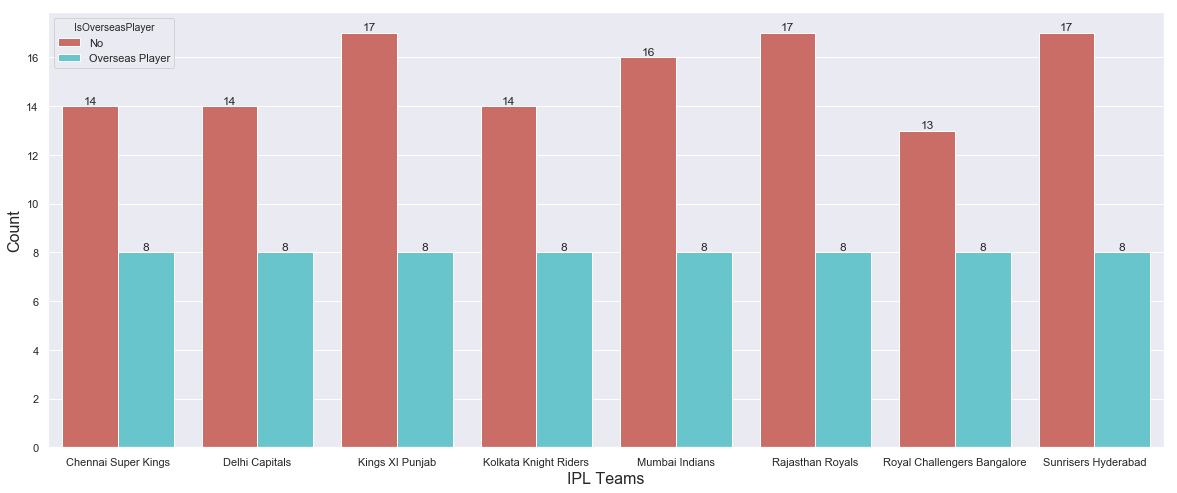

In [114]:
def countplot_function(X,Y):
    sns.set(style = 'darkgrid')
    sns.set_palette('hls', 2)
    fig, ax = plt.subplots(figsize = (20,8))
    ax = sns.countplot(x = X, hue = Y)
    plt.ylabel('Count',size = 16)
    plt.xlabel('IPL Teams',size = 16)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,height +0.1, '{:1.0f}'.format(height),ha = "center")
    plt.show()

countplot_function(Cleaned_df['Team'],Cleaned_df['IsOverseasPlayer'])

# Number of Uncapped Players in each Team
Rajasthan and Punjab have highest number of ucapped players

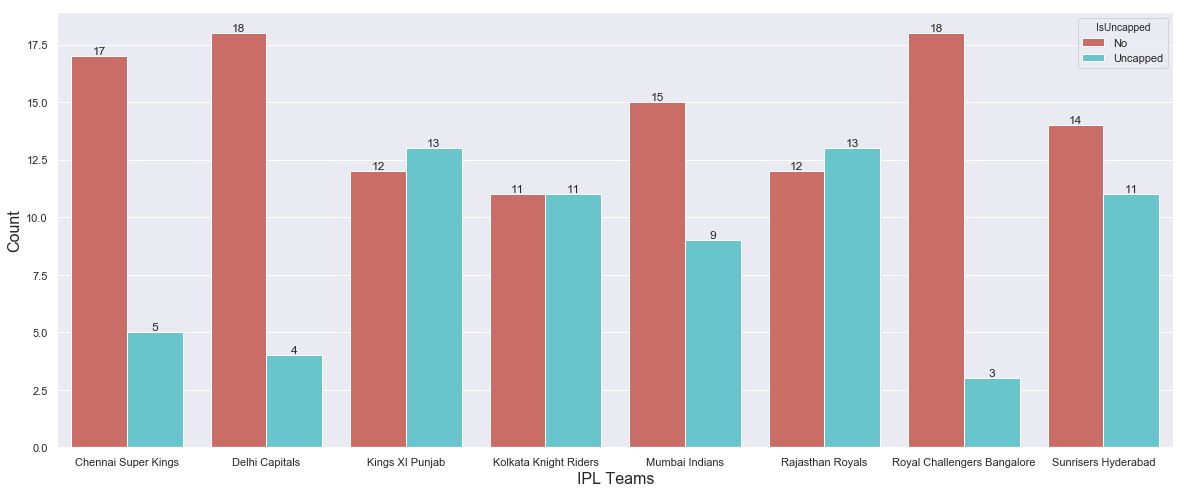

In [113]:
countplot_function(Cleaned_df['Team'],Cleaned_df['IsUncapped'])
